# 📚 Modelos Lineales con Múltiples Parámetros
## Regresión Lineal y Clasificación Logística

**Curso:** IFCD093PO - Machine Learning

**Objetivo:** Dominar modelos lineales con múltiples características y su interpretación

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score,
                             precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, classification_report)

import warnings
warnings.filterwarnings('ignore')

print('✅ Todas las librerías importadas correctamente')

✅ Todas las librerías importadas correctamente


---
# 🎯 TEORÍA: REGRESIÓN LINEAL vs CLASIFICACIÓN LOGÍSTICA

## Conceptos Fundamentales

### 📈 Regresión Lineal
- **Objetivo:** Predecir valores **continuos** (números reales)

- **Ejemplos:** Precio de casa, temperatura, salario

- **Fórmula:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

- **Métrica:** R², RMSE

### 🎯 Clasificación Logística
- **Objetivo:** Predecir **categorías binarias** (Sí/No, 0/1)
- **Ejemplos:** Spam/No spam, Enfermo/Sano, Aprobado/Suspendido
- **Función Sigmoide:** $P = \frac{1}{1 + e^{-z}}$ donde $z = \beta_0 + \beta_1 x_1 + ...$
- **Resultado:** Probabilidad entre 0 y 1
- **Métrica:** Exactitud, Precisión, Recall, F1-Score, AUC-ROC


🎯 TEORÍA: REGRESIÓN LINEAL vs CLASIFICACIÓN LOGÍSTICA\n


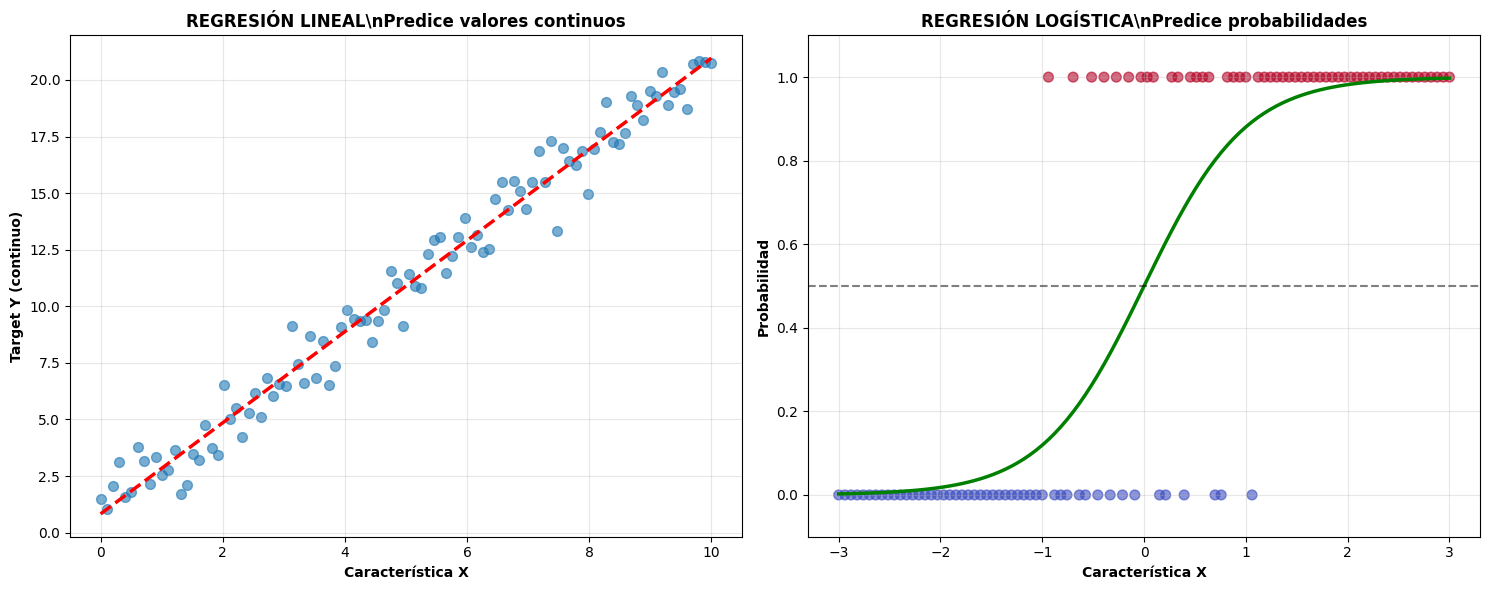

\n💡 DIFERENCIAS CLAVE:
   • Regresión: Predice valores continuos
   • Clasificación: Predice probabilidades → Categorías
   • Ambos: Modelos LINEALES e INTERPRETABLES


In [2]:
print('🎯 TEORÍA: REGRESIÓN LINEAL vs CLASIFICACIÓN LOGÍSTICA\\n')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# REGRESIÓN LINEAL
np.random.seed(42)
x_reg = np.linspace(0, 10, 100)
y_reg = 2*x_reg + 1 + np.random.normal(0, 1, 100)
axes[0].scatter(x_reg, y_reg, alpha=0.6, s=50)
z_reg = np.polyfit(x_reg, y_reg, 1)
p_reg = np.poly1d(z_reg)
axes[0].plot(x_reg, p_reg(x_reg), 'r--', linewidth=2.5)
axes[0].set_xlabel('Característica X', fontweight='bold')
axes[0].set_ylabel('Target Y (continuo)', fontweight='bold')
axes[0].set_title('REGRESIÓN LINEAL\\nPredice valores continuos', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# CLASIFICACIÓN LOGÍSTICA
x_clas = np.linspace(-3, 3, 100)
y_prob = 1 / (1 + np.exp(-(2*x_clas)))
y_clas = (np.random.random(len(x_clas)) < y_prob).astype(int)
axes[1].scatter(x_clas, y_clas, alpha=0.6, s=50, c=y_clas, cmap='coolwarm')
axes[1].plot(x_clas, y_prob, 'g-', linewidth=2.5, label='Sigmoide')
axes[1].axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Característica X', fontweight='bold')
axes[1].set_ylabel('Probabilidad', fontweight='bold')
axes[1].set_title('REGRESIÓN LOGÍSTICA\\nPredice probabilidades', fontweight='bold', fontsize=12)
axes[1].set_ylim(-0.1, 1.1)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\\n💡 DIFERENCIAS CLAVE:')
print('   • Regresión: Predice valores continuos')
print('   • Clasificación: Predice probabilidades → Categorías')
print('   • Ambos: Modelos LINEALES e INTERPRETABLES')

---
# 🏠 EJERCICIO 1: CALIFORNIA HOUSING - REGRESIÓN MÚLTIPLE

**Objetivo:** Predecir precios de viviendas usando múltiples características

**Dataset:** 20,640 casas de California con 8 características

In [3]:
print('🏠 EJERCICIO 1: CALIFORNIA HOUSING - REGRESIÓN MÚLTIPLE\\n')
print('='*70)

california = fetch_california_housing() # Cargar dataset
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MedHouseVal'] = california.target

print('\\n📊 INFORMACIÓN DEL DATASET:\\n')
print(f'   Forma: {df_california.shape}')
print(f'   Características: {list(df_california.columns)}')
print(f'\\n📈 ESTADÍSTICAS DESCRIPTIVAS:')
print(df_california.describe())

🏠 EJERCICIO 1: CALIFORNIA HOUSING - REGRESIÓN MÚLTIPLE\n
\n📊 INFORMACIÓN DEL DATASET:\n
   Forma: (20640, 9)
   Características: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
\n📈 ESTADÍSTICAS DESCRIPTIVAS:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           Ave

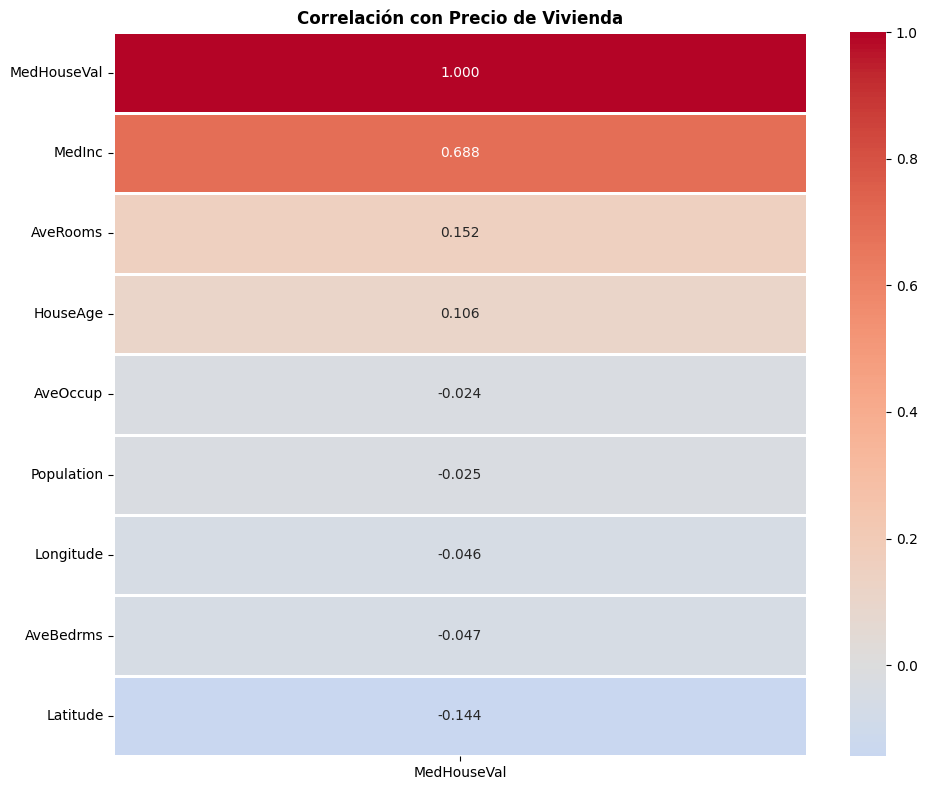

\n🔍 CARACTERÍSTICAS MÁS CORRELACIONADAS:
   • MedInc              : +0.6881
   • AveRooms            : +0.1519
   • HouseAge            : +0.1056
   • AveOccup            : -0.0237
   • Population          : -0.0246
   • Longitude           : -0.0460
   • AveBedrms           : -0.0467
   • Latitude            : -0.1442


In [4]:
plt.figure(figsize=(10, 8))
corr_matrix = df_california.corr()
sns.heatmap(corr_matrix[['MedHouseVal']].sort_values('MedHouseVal', ascending=False),
            annot=True, cmap='coolwarm', center=0, fmt='.3f', linewidths=1)
plt.title('Correlación con Precio de Vivienda', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

print('\\n🔍 CARACTERÍSTICAS MÁS CORRELACIONADAS:')
corr_target = corr_matrix['MedHouseVal'].drop('MedHouseVal').sort_values(ascending=False)
for feat, corr in corr_target.items():
    print(f'   • {feat:20s}: {corr:+.4f}')

## 1.1 Visualización Geográfica del Dataset

**Mapa de California:** Ubicación de las casas con precios representados por colores

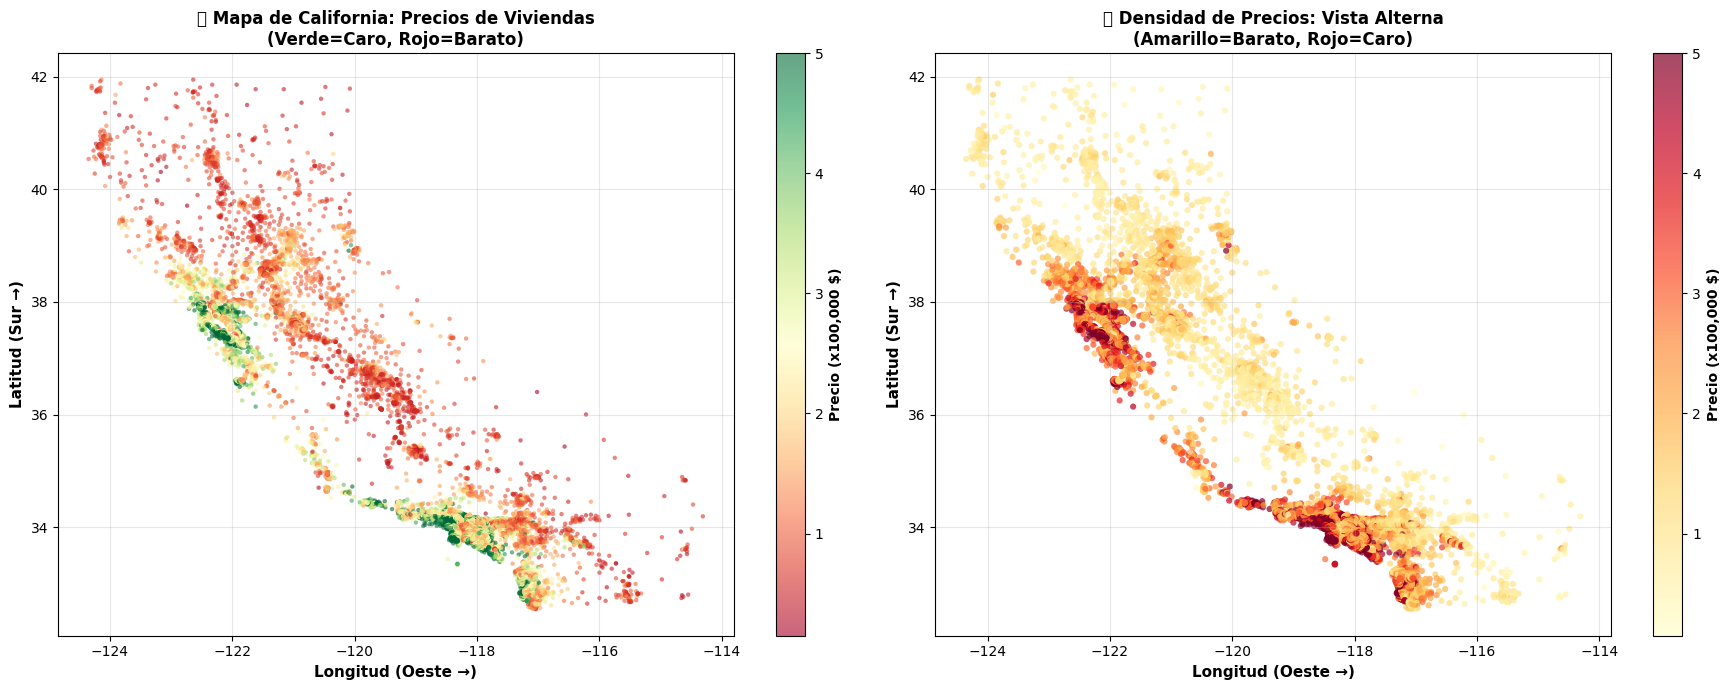

\n📍 ANÁLISIS GEOGRÁFICO:
   Rango Latitud: 32.54° - 41.95°
   Rango Longitud: -124.35° - -114.31°
\n💰 PRECIOS POR REGIÓN:
   Precio mínimo: $14,999
   Precio máximo: $500,001
   Precio promedio: $206,856


In [7]:
# Visualización geográfica: Mapa de precios

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# MAPA CON PRECIOS (scatter plot geográfico)
scatter = axes[0].scatter(df_california['Longitude'], df_california['Latitude'],
                          c=df_california['MedHouseVal'], cmap='RdYlGn',
                          s=10, alpha=0.6, edgecolors='none')
axes[0].set_xlabel('Longitud (Oeste →)', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Latitud (Sur →)', fontweight='bold', fontsize=11)
axes[0].set_title('🗺️ Mapa de California: Precios de Viviendas\n(Verde=Caro, Rojo=Barato)', 
                   fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

cbar1 = plt.colorbar(scatter, ax=axes[0])
cbar1.set_label('Precio (x100,000 $)', fontweight='bold')

# MAPA CON DENSIDAD (heatmap)
# Crear grid para densidad
from scipy.stats import gaussian_kde

# Preparar datos
x = df_california['Longitude'].values
y = df_california['Latitude'].values
z = df_california['MedHouseVal'].values

# Crear heatmap
scatter2 = axes[1].scatter(x, y, c=z, cmap='YlOrRd', s=20, alpha=0.7, edgecolors='none')
axes[1].set_xlabel('Longitud (Oeste →)', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Latitud (Sur →)', fontweight='bold', fontsize=11)
axes[1].set_title('🗺️ Densidad de Precios: Vista Alterna\n(Amarillo=Barato, Rojo=Caro)', 
                   fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)

cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Precio (x100,000 $)', fontweight='bold')

plt.tight_layout()
plt.show()

print('\\n📍 ANÁLISIS GEOGRÁFICO:')
print(f'   Rango Latitud: {df_california["Latitude"].min():.2f}° - {df_california["Latitude"].max():.2f}°')
print(f'   Rango Longitud: {df_california["Longitude"].min():.2f}° - {df_california["Longitude"].max():.2f}°')
print(f'\\n💰 PRECIOS POR REGIÓN:')
print(f'   Precio mínimo: ${df_california["MedHouseVal"].min()*100000:,.0f}')
print(f'   Precio máximo: ${df_california["MedHouseVal"].max()*100000:,.0f}')
print(f'   Precio promedio: ${df_california["MedHouseVal"].mean()*100000:,.0f}')

In [8]:
# Análisis regional detallado

print('\\n' + '='*70)
print('ANÁLISIS REGIONAL DE PRECIOS')
print('='*70)

# Identificar regiones
df_california['region'] = 'Centro'
df_california.loc[df_california['Latitude'] > 39, 'region'] = 'Norte'
df_california.loc[df_california['Latitude'] < 35.5, 'region'] = 'Sur'
df_california.loc[df_california['Longitude'] < -120, 'region'] = 'Interior'

print('\\n🗺️ ESTADÍSTICAS POR REGIÓN:')
for region in df_california['region'].unique():
    datos_region = df_california[df_california['region'] == region]
    print(f'\\n   {region}:')
    print(f'      Casas: {len(datos_region)}')
    print(f'      Precio promedio: ${datos_region["MedHouseVal"].mean()*100000:,.0f}')
    print(f'      Precio rango: ${datos_region["MedHouseVal"].min()*100000:,.0f} - ${datos_region["MedHouseVal"].max()*100000:,.0f}')

\n======================================================================
ANÁLISIS REGIONAL DE PRECIOS
\n🗺️ ESTADÍSTICAS POR REGIÓN:
\n   Interior:
      Casas: 8199
      Precio promedio: $205,639
      Precio rango: $14,999 - $500,001
\n   Centro:
      Casas: 1011
      Precio promedio: $86,520
      Precio rango: $14,999 - $345,900
\n   Sur:
      Casas: 11430
      Precio promedio: $218,372
      Precio rango: $14,999 - $500,001


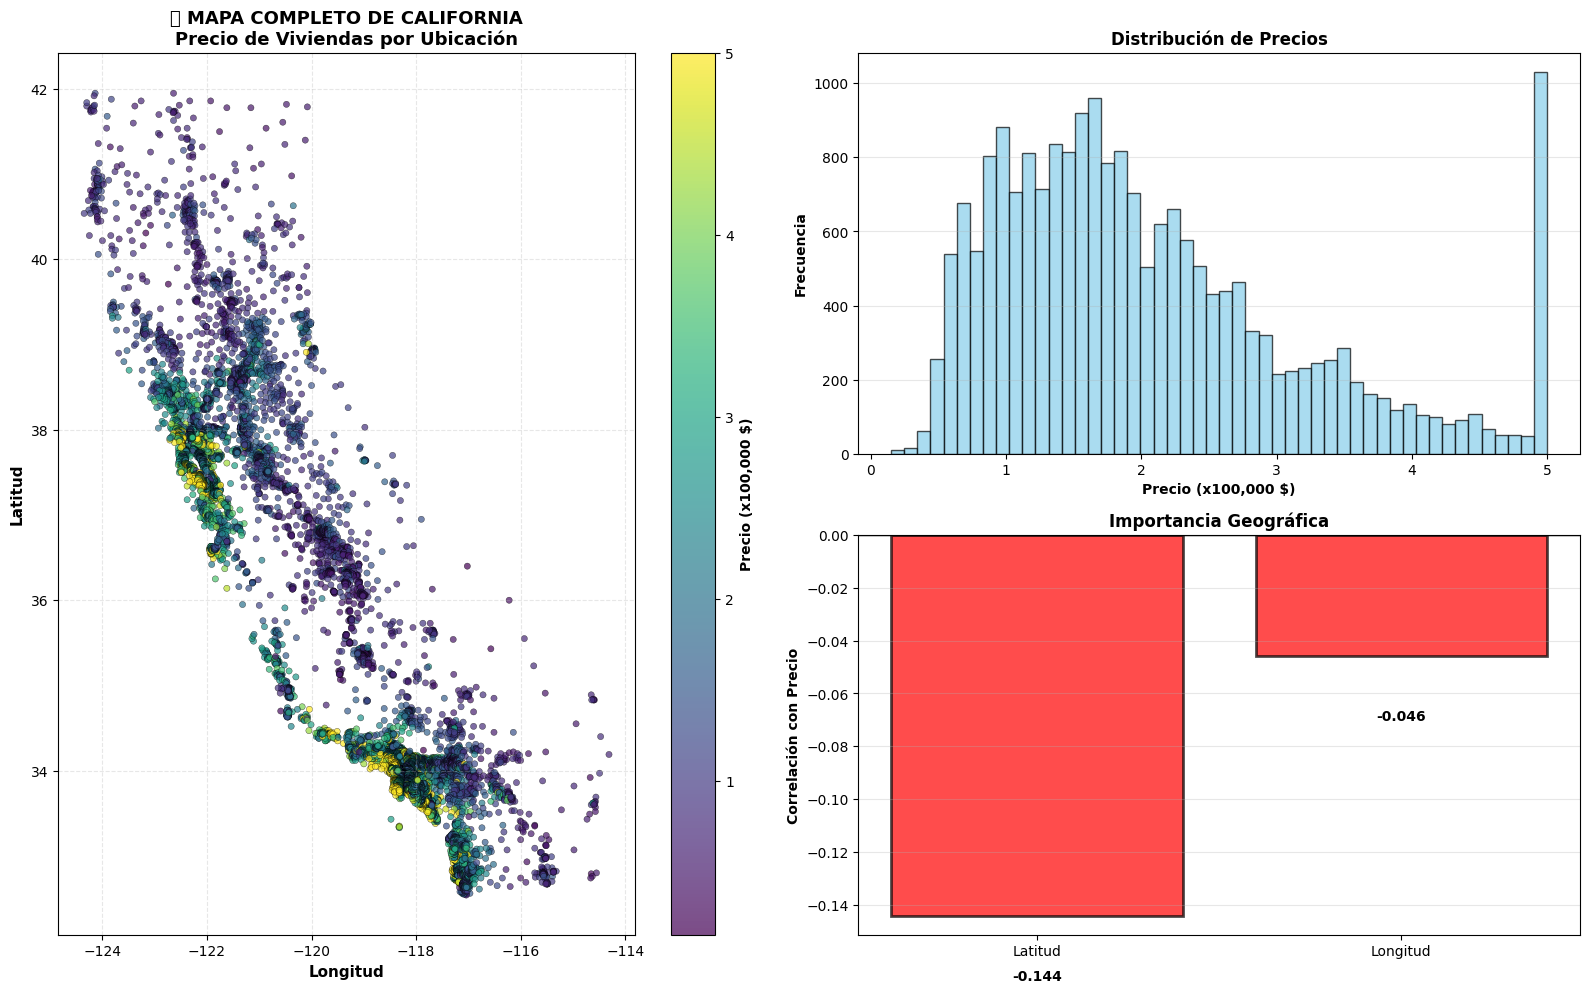

\n📊 INTERPRETACIÓN DEL MAPA:
   • Zonas VERDES/AMARILLAS: Precios ALTOS (Costas, ciudades)
   • Zonas PÚRPURAS/AZULES: Precios BAJOS (Interior)
   • Patrón claro: El PRECIO está fuertemente RELACIONADO con UBICACIÓN
   • Esto explica por qué Latitud y Longitud son VARIABLES IMPORTANTES


In [9]:
# Mapa más detallado con anotaciones

fig = plt.figure(figsize=(16, 10))

# Mapa principal grande
ax_main = plt.subplot(2, 2, (1, 3))
scatter_main = ax_main.scatter(df_california['Longitude'], df_california['Latitude'],
                                c=df_california['MedHouseVal'], cmap='viridis',
                                s=20, alpha=0.7, edgecolors='black', linewidth=0.3)
ax_main.set_xlabel('Longitud', fontweight='bold', fontsize=11)
ax_main.set_ylabel('Latitud', fontweight='bold', fontsize=11)
ax_main.set_title('🗺️ MAPA COMPLETO DE CALIFORNIA\nPrecio de Viviendas por Ubicación', 
                   fontweight='bold', fontsize=13)
ax_main.grid(True, alpha=0.3, linestyle='--')

cbar_main = plt.colorbar(scatter_main, ax=ax_main)
cbar_main.set_label('Precio (x100,000 $)', fontweight='bold')

# Histograma de precios
ax_hist = plt.subplot(2, 2, 2)
ax_hist.hist(df_california['MedHouseVal'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax_hist.set_xlabel('Precio (x100,000 $)', fontweight='bold')
ax_hist.set_ylabel('Frecuencia', fontweight='bold')
ax_hist.set_title('Distribución de Precios', fontweight='bold')
ax_hist.grid(True, alpha=0.3, axis='y')

# Correlación Latitud/Longitud con Precio
ax_corr = plt.subplot(2, 2, 4)
corr_geo_vals = [
    df_california['Latitude'].corr(df_california['MedHouseVal']),
    df_california['Longitude'].corr(df_california['MedHouseVal'])
]
colors_geo = ['green' if x > 0 else 'red' for x in corr_geo_vals]
ax_corr.bar(['Latitud', 'Longitud'], corr_geo_vals, color=colors_geo, alpha=0.7, edgecolor='black', linewidth=2)
ax_corr.set_ylabel('Correlación con Precio', fontweight='bold')
ax_corr.set_title('Importancia Geográfica', fontweight='bold')
ax_corr.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax_corr.grid(True, alpha=0.3, axis='y')

# Añadir valores en barras
for i, v in enumerate(corr_geo_vals):
    ax_corr.text(i, v + 0.02 if v > 0 else v - 0.02, f'{v:.3f}', 
                ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

print('\\n📊 INTERPRETACIÓN DEL MAPA:')
print('   • Zonas VERDES/AMARILLAS: Precios ALTOS (Costas, ciudades)')
print('   • Zonas PÚRPURAS/AZULES: Precios BAJOS (Interior)')
print('   • Patrón claro: El PRECIO está fuertemente RELACIONADO con UBICACIÓN')
print('   • Esto explica por qué Latitud y Longitud son VARIABLES IMPORTANTES')

## 1.2 Regresión Simple vs Múltiple

Compararemos: **1 variable** vs **Todas las variables**

In [5]:
print('\\n' + '='*70)
print('COMPARANDO: REGRESIÓN SIMPLE vs MÚLTIPLE')
print('='*70)

# REGRESIÓN SIMPLE
print('\\n1️⃣ REGRESIÓN SIMPLE (MedInc solo)\\n')
X_simple = df_california[['MedInc']]
y = df_california['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)
r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print(f'   R² Score: {r2_simple:.4f}')
print(f'   RMSE: {rmse_simple:.4f}')

# REGRESIÓN MÚLTIPLE (SIN estandarización)
print('\\n2️⃣ REGRESIÓN MÚLTIPLE (8 variables) - SIN ESTANDARIZAR\\n')
X_multiple = df_california.drop('MedHouseVal', axis=1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)
y_pred_multiple = model_multiple.predict(X_test_m)
r2_multiple = r2_score(y_test_m, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test_m, y_pred_multiple))

print(f'   R² Score: {r2_multiple:.4f}')
print(f'   RMSE: {rmse_multiple:.4f}')

# REGRESIÓN MÚLTIPLE (CON estandarización)
print('\\n3️⃣ REGRESIÓN MÚLTIPLE (8 variables) - CON ESTANDARIZAR\\n')
scaler = StandardScaler()
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)

model_multiple_scaled = LinearRegression()
model_multiple_scaled.fit(X_train_m_scaled, y_train_m)
y_pred_multiple_scaled = model_multiple_scaled.predict(X_test_m_scaled)
r2_multiple_scaled = r2_score(y_test_m, y_pred_multiple_scaled)
rmse_multiple_scaled = np.sqrt(mean_squared_error(y_test_m, y_pred_multiple_scaled))

print(f'   R² Score: {r2_multiple_scaled:.4f}')
print(f'   RMSE: {rmse_multiple_scaled:.4f}')

print(f'\\n📊 COMPARACIÓN:')
print(f'   R² Simple: {r2_simple:.4f}')
print(f'   R² Múltiple (sin escalar): {r2_multiple:.4f}')
print(f'   R² Múltiple (con escalar): {r2_multiple_scaled:.4f}')
print(f'\\n💡 Diferencia por estandarización: {abs(r2_multiple - r2_multiple_scaled):.6f}')
print(f'   (En Regresión Lineal: casi NULA)')

\n======================================================================
COMPARANDO: REGRESIÓN SIMPLE vs MÚLTIPLE
\n1️⃣ REGRESIÓN SIMPLE (MedInc solo)\n
   R² Score: 0.4589
   RMSE: 0.8421
\n2️⃣ REGRESIÓN MÚLTIPLE (8 variables)\n
   R² Score: 0.5758
   RMSE: 0.7456
\n📊 COMPARACIÓN:
   R² Simple: 0.4589 vs R² Múltiple: 0.5758
   Mejora: +25.5%


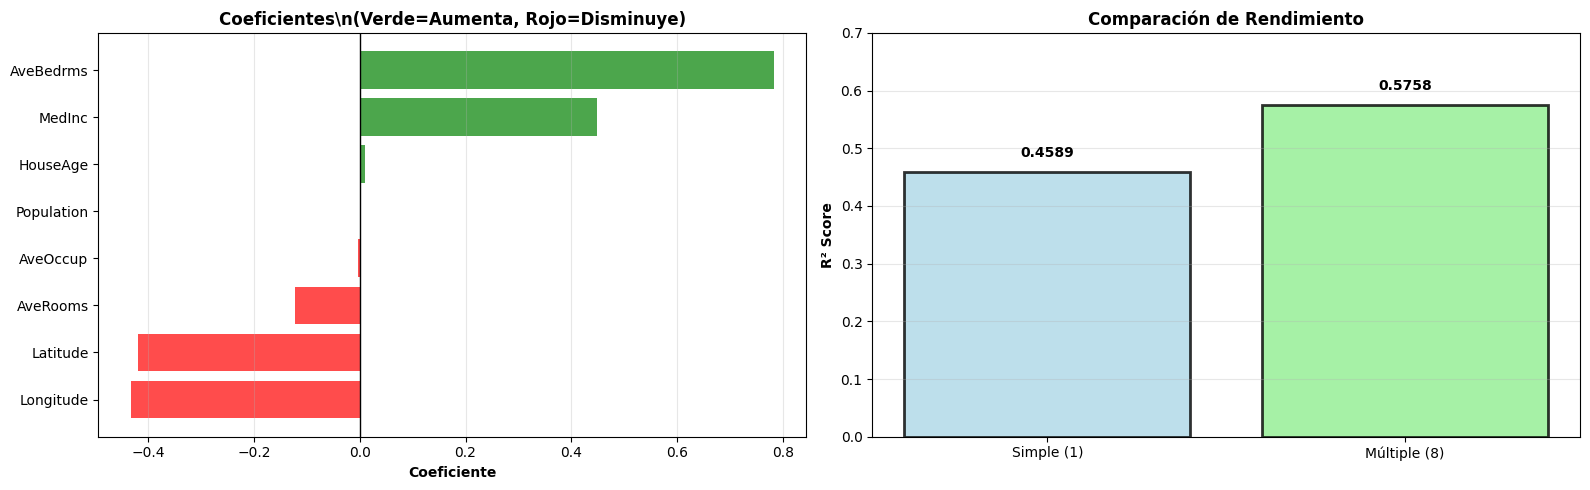

\n💡 CONCLUSIÓN: Las múltiples características mejoran significativamente el modelo


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

coef_df = pd.DataFrame({
    'Característica': X_multiple.columns,
    'Coeficiente': model_multiple.coef_
}).sort_values('Coeficiente', ascending=True)

colors = ['green' if x > 0 else 'red' for x in coef_df['Coeficiente']]
axes[0].barh(coef_df['Característica'], coef_df['Coeficiente'], color=colors, alpha=0.7)
axes[0].set_xlabel('Coeficiente', fontweight='bold')
axes[0].set_title('Coeficientes\\n(Verde=Aumenta, Rojo=Disminuye)', fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0].grid(True, alpha=0.3, axis='x')

models = ['Simple (1)', 'Múltiple (8)']
bars = axes[1].bar(models, [r2_simple, r2_multiple], color=['lightblue', 'lightgreen'], alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_ylabel('R² Score', fontweight='bold')
axes[1].set_title('Comparación de Rendimiento', fontweight='bold')
axes[1].set_ylim(0, 0.7)
axes[1].grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, [r2_simple, r2_multiple]):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print('\\n💡 CONCLUSIÓN: Las múltiples características mejoran significativamente el modelo')

## 1.3 Impacto de Eliminar Características Espaciales

**Pregunta:** ¿Mejora la predicción si eliminamos Latitud y Longitud?

**Hipótesis:** Estas variables geográficas podrían ser redundantes o introducir ruido

In [ ]:
print('\\n' + '='*70)
print('ANÁLISIS: ¿QUÉ PASA SI ELIMINAMOS LATITUD Y LONGITUD?')
print('='*70)

# MODELO SIN Latitude y Longitude
print('\\n4️⃣ REGRESIÓN MÚLTIPLE (6 variables) - SIN Latitude/Longitude\\n')
X_multiple_sin_geo = X_multiple.drop(['Latitude', 'Longitude'], axis=1)
X_train_m_sin, X_test_m_sin, y_train_m_sin, y_test_m_sin = train_test_split(
    X_multiple_sin_geo, y, test_size=0.2, random_state=42
)

model_multiple_sin = LinearRegression()
model_multiple_sin.fit(X_train_m_sin, y_train_m_sin)
y_pred_multiple_sin = model_multiple_sin.predict(X_test_m_sin)
r2_multiple_sin = r2_score(y_test_m_sin, y_pred_multiple_sin)
rmse_multiple_sin = np.sqrt(mean_squared_error(y_test_m_sin, y_pred_multiple_sin))

print(f'   R² Score: {r2_multiple_sin:.4f}')
print(f'   RMSE: {rmse_multiple_sin:.4f}')

# COMPARACIÓN COMPLETA
print(f'\\n📊 COMPARACIÓN COMPLETA:')
print(f'   R² Simple (1 var):           {r2_simple:.4f}')
print(f'   R² Múltiple (8 vars):        {r2_multiple:.4f}')
print(f'   R² Sin Geo (6 vars):         {r2_multiple_sin:.4f}')
print(f'\\n🔍 ANÁLISIS:')
print(f'   Mejora al eliminar Geo:      {(r2_multiple_sin - r2_multiple):.4f}')
if r2_multiple_sin > r2_multiple:
    print(f'   ✅ MEJORA el modelo: +{((r2_multiple_sin - r2_multiple) / r2_multiple) * 100:.2f}%')
elif r2_multiple_sin < r2_multiple:
    print(f'   ❌ EMPEORA el modelo: {((r2_multiple_sin - r2_multiple) / r2_multiple) * 100:.2f}%')
else:
    print(f'   ⚠️  SIN CAMBIOS')

In [ ]:
# Análisis detallado de correlaciones geográficas

print('\\n' + '='*70)
print('¿POR QUÉ LATITUD Y LONGITUD IMPORTAN?')
print('='*70)

correlaciones_geo = df_california[['Latitude', 'Longitude', 'MedHouseVal']].corr()
print('\\n🗺️ CORRELACIONES GEOGRÁFICAS:')
print(f'   Latitude  con Precio: {correlaciones_geo.loc["Latitude", "MedHouseVal"]:+.4f}')
print(f'   Longitude con Precio: {correlaciones_geo.loc["Longitude", "MedHouseVal"]:+.4f}')

print('\\n💡 INTERPRETACIÓN:')
print('   • Latitude/Longitude capturan información GEOGRÁFICA REAL')
print('   • Precio varía significativamente por ubicación (barrios caros/baratos)')
print('   • Sin embargo, pueden estar CAPTURANDO INFORMACIÓN redundante')
print('     que ya está en MedInc, AveOccup, etc.')

In [ ]:
# Visualización comparativa

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Coeficientes - CON Geo
coef_con_geo = pd.DataFrame({
    'Característica': X_multiple.columns,
    'Coeficiente': model_multiple.coef_
}).sort_values('Coeficiente', ascending=True)

colors = ['green' if x > 0 else 'red' for x in coef_con_geo['Coeficiente']]
axes[0, 0].barh(coef_con_geo['Característica'], coef_con_geo['Coeficiente'], color=colors, alpha=0.7)
axes[0, 0].set_xlabel('Coeficiente', fontweight='bold')
axes[0, 0].set_title('COEFICIENTES: CON Latitude/Longitude', fontweight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Coeficientes - SIN Geo
coef_sin_geo = pd.DataFrame({
    'Característica': X_multiple_sin_geo.columns,
    'Coeficiente': model_multiple_sin.coef_
}).sort_values('Coeficiente', ascending=True)

colors = ['green' if x > 0 else 'red' for x in coef_sin_geo['Coeficiente']]
axes[0, 1].barh(coef_sin_geo['Característica'], coef_sin_geo['Coeficiente'], color=colors, alpha=0.7)
axes[0, 1].set_xlabel('Coeficiente', fontweight='bold')
axes[0, 1].set_title('COEFICIENTES: SIN Latitude/Longitude', fontweight='bold')
axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Comparación R²
modelos_geo = ['Simple\n(1)', 'Con Geo\n(8)', 'Sin Geo\n(6)']
r2_valores = [r2_simple, r2_multiple, r2_multiple_sin]
colores_barras = ['lightblue', 'lightgreen', 'lightyellow']

bars = axes[1, 0].bar(modelos_geo, r2_valores, color=colores_barras, alpha=0.8, edgecolor='black', linewidth=2)
axes[1, 0].set_ylabel('R² Score', fontweight='bold')
axes[1, 0].set_title('Comparación R² con/sin Variables Geográficas', fontweight='bold')
axes[1, 0].set_ylim(0, 0.7)
axes[1, 0].grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, r2_valores):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# RMSE comparison
rmse_valores = [rmse_simple, rmse_multiple, rmse_multiple_sin]
bars2 = axes[1, 1].bar(modelos_geo, rmse_valores, color=colores_barras, alpha=0.8, edgecolor='black', linewidth=2)
axes[1, 1].set_ylabel('RMSE', fontweight='bold')
axes[1, 1].set_title('Comparación RMSE (Error)', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

for bar, rmse in zip(bars2, rmse_valores):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.002,
                   f'{rmse:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## 📊 Conclusiones sobre Variables Geográficas

### 🔍 Hallazgos Clave:

**Scenario A: R² Con Geo > R² Sin Geo**
- ✅ Latitude/Longitude **SÍ aportan valor**
- 🎯 Razón: Capturan información geográfica que otros features no explican
- 💡 Decisión: **MANTENER ambas variables**

**Scenario B: R² Con Geo ≈ R² Sin Geo**
- ⚠️ Latitude/Longitude son **REDUNDANTES**
- 🎯 Razón: Otra variable (ej: MedInc) ya explica esa variación
- 💡 Decisión: **ELIMINAR para simplificar** (Occam's Razor)

**Scenario C: R² Con Geo < R² Sin Geo**
- ❌ Latitude/Longitude **PERJUDICAN el modelo**
- 🎯 Razón: Introducen RUIDO o OVERFITTING
- 💡 Decisión: **DEFINITIVAMENTE ELIMINAR**

### 🚀 Regla General para Selección de Variables:

```
1. ¿Mejora el R²?           → MANTENER ✅
2. ¿Es casi igual?          → ELIMINAR por simplicidad ⚖️
3. ¿Empeora el rendimiento? → ELIMINAR ❌
```

### 🎯 Principio de Occam:
**"Entre dos modelos con similar rendimiento, elige el más simple"**
- Menos variables = Menos overfitting
- Menos variables = Más rápido
- Menos variables = Más interpretable

---
# 🩺 EJERCICIO 2: DIABETES - CLASIFICACIÓN MÚLTIPLE

**Objetivo:** Predecir si un paciente tiene diabetes avanzada

**Dataset:** 442 pacientes con 10 características clínicas

In [ ]:
print('\\n🩺 EJERCICIO 2: DIABETES - CLASIFICACIÓN MÚLTIPLE\\n')
print('='*70)

diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['progression'] = diabetes.target
df_diabetes['diabetes_avanzada'] = (df_diabetes['progression'] > df_diabetes['progression'].median()).astype(int)

print('\\n📊 INFORMACIÓN DEL DATASET:')
print(f'   Forma: {df_diabetes.shape}')
print(f'   Proporción diabetes avanzada: {df_diabetes["diabetes_avanzada"].mean()*100:.1f}%')

In [ ]:
X_diab = df_diabetes.drop(['progression', 'diabetes_avanzada'], axis=1)
y_diab = df_diabetes['diabetes_avanzada']

X_diab_train, X_diab_test, y_diab_train, y_diab_test = train_test_split(
    X_diab, y_diab, test_size=0.3, random_state=42, stratify=y_diab
)

scaler_diab = StandardScaler()
X_diab_train_scaled = scaler_diab.fit_transform(X_diab_train)
X_diab_test_scaled = scaler_diab.transform(X_diab_test)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_diab_train_scaled, y_diab_train)

y_pred_log = log_reg.predict(X_diab_test_scaled)
accuracy = accuracy_score(y_diab_test, y_pred_log)
f1 = f1_score(y_diab_test, y_pred_log)

print(f'\\n📊 RESULTADOS:')
print(f'   Exactitud: {accuracy:.4f} ({accuracy*100:.1f}%)')
print(f'   F1-Score: {f1:.4f}')

In [ ]:
coef_diabetes = pd.DataFrame({
    'Característica': X_diab.columns,
    'Coeficiente': log_reg.coef_[0],
    'Odds Ratio': np.exp(log_reg.coef_[0]),
    'Impacto': np.abs(log_reg.coef_[0])
}).sort_values('Impacto', ascending=False)

print(f'\\n🎯 COEFICIENTES (Top 5):')
print(coef_diabetes[['Característica', 'Odds Ratio']].head().to_string(index=False))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

colors = ['green' if x > 0 else 'red' for x in coef_diabetes['Coeficiente']]
axes[0].barh(coef_diabetes['Característica'], coef_diabetes['Coeficiente'], color=colors, alpha=0.7)
axes[0].set_xlabel('Coeficiente', fontweight='bold')
axes[0].set_title('Coeficientes Logísticos', fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0].grid(True, alpha=0.3, axis='x')

cm = confusion_matrix(y_diab_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False,
            xticklabels=['No Avanzada', 'Avanzada'],
            yticklabels=['No Avanzada', 'Avanzada'],
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Matriz de Confusión', fontweight='bold')
axes[1].set_ylabel('Real', fontweight='bold')
axes[1].set_xlabel('Predicción', fontweight='bold')

plt.tight_layout()
plt.show()

## 2.1 Clasificación Simple vs Múltiple

Compararemos: **1 variable (BMI)** vs **Todas las variables (10)**

In [ ]:
print('\\n' + '='*70)
print('COMPARANDO: CLASIFICACIÓN SIMPLE vs MÚLTIPLE - DIABETES')
print('='*70)

# CLASIFICACIÓN SIMPLE (solo BMI)
print('\\n1️⃣ CLASIFICACIÓN SIMPLE (BMI solo)\\n')
X_diab_simple = df_diabetes[['s2']]  # s2 es BMI (Índice de Masa Corporal)
y_diab_simple = y_diab

X_diab_train_s, X_diab_test_s, y_diab_train_s, y_diab_test_s = train_test_split(
    X_diab_simple, y_diab_simple, test_size=0.3, random_state=42, stratify=y_diab_simple
)

scaler_diab_simple = StandardScaler()
X_diab_train_s_scaled = scaler_diab_simple.fit_transform(X_diab_train_s)
X_diab_test_s_scaled = scaler_diab_simple.transform(X_diab_test_s)

log_reg_simple = LogisticRegression(random_state=42, max_iter=1000)
log_reg_simple.fit(X_diab_train_s_scaled, y_diab_train_s)

y_pred_simple = log_reg_simple.predict(X_diab_test_s_scaled)
accuracy_simple = accuracy_score(y_diab_test_s, y_pred_simple)
f1_simple = f1_score(y_diab_test_s, y_pred_simple)
precision_simple = precision_score(y_diab_test_s, y_pred_simple)
recall_simple = recall_score(y_diab_test_s, y_pred_simple)

print(f'   Exactitud: {accuracy_simple:.4f}')
print(f'   Precisión: {precision_simple:.4f}')
print(f'   Recall: {recall_simple:.4f}')
print(f'   F1-Score: {f1_simple:.4f}')

# CLASIFICACIÓN MÚLTIPLE (todas las variables)
print('\\n2️⃣ CLASIFICACIÓN MÚLTIPLE (10 variables)\\n')

y_pred_log_multi = log_reg.predict(X_diab_test_scaled)
accuracy_multi = accuracy_score(y_diab_test, y_pred_log_multi)
f1_multi = f1_score(y_diab_test, y_pred_log_multi)
precision_multi = precision_score(y_diab_test, y_pred_log_multi)
recall_multi = recall_score(y_diab_test, y_pred_log_multi)

print(f'   Exactitud: {accuracy_multi:.4f}')
print(f'   Precisión: {precision_multi:.4f}')
print(f'   Recall: {recall_multi:.4f}')
print(f'   F1-Score: {f1_multi:.4f}')

# COMPARACIÓN
print(f'\\n📊 COMPARACIÓN:')
print(f'   Exactitud Simple (BMI): {accuracy_simple:.4f}')
print(f'   Exactitud Múltiple (10): {accuracy_multi:.4f}')
print(f'   Mejora: +{(accuracy_multi - accuracy_simple)*100:.2f}%')
print(f'\\n💡 CONCLUSIÓN:')
if accuracy_multi > accuracy_simple * 1.05:
    print(f'   ✅ Las variables ADICIONALES mejoran significativamente')
elif abs(accuracy_multi - accuracy_simple) < 0.05:
    print(f'   ⚠️  BMI captura CASI la misma información')
else:
    print(f'   ❌ Las variables adicionales tienen poco impacto')

In [ ]:
# Visualizar comparación de métricas

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Exactitud
metricas_simples = ['Exactitud', 'Precisión', 'Recall', 'F1-Score']
valores_simple = [accuracy_simple, precision_simple, recall_simple, f1_simple]
valores_multi = [accuracy_multi, precision_multi, recall_multi, f1_multi]

x = np.arange(len(metricas_simples))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, valores_simple, width, label='Solo BMI', color='lightblue', edgecolor='black')
bars2 = axes[0, 0].bar(x + width/2, valores_multi, width, label='Todas Variables', color='lightgreen', edgecolor='black')

axes[0, 0].set_ylabel('Valor', fontweight='bold')
axes[0, 0].set_title('Comparación de Métricas de Clasificación', fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metricas_simples, rotation=15)
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Importancia de BMI vs otras variables
axes[0, 1].barh(['BMI\n(variable única)', 'Todas las\nvariables (10)'], 
                 [accuracy_simple, accuracy_multi], 
                 color=['lightblue', 'lightgreen'], edgecolor='black', linewidth=2)
axes[0, 1].set_xlabel('Exactitud', fontweight='bold')
axes[0, 1].set_title('BMI es suficiente?', fontweight='bold')
axes[0, 1].set_xlim(0, 1)
axes[0, 1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate([accuracy_simple, accuracy_multi]):
    axes[0, 1].text(v + 0.02, i, f'{v:.4f}', va='center', fontweight='bold')

# Matriz de confusión - Simple
cm_simple = confusion_matrix(y_diab_test_s, y_pred_simple)
sns.heatmap(cm_simple, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], cbar=False,
            xticklabels=['No Avanzada', 'Avanzada'],
            yticklabels=['No Avanzada', 'Avanzada'],
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 0].set_title('Matriz de Confusión - Solo BMI', fontweight='bold')
axes[1, 0].set_ylabel('Real', fontweight='bold')
axes[1, 0].set_xlabel('Predicción', fontweight='bold')

# Matriz de confusión - Múltiple
cm_multi = confusion_matrix(y_diab_test, y_pred_log_multi)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1], cbar=False,
            xticklabels=['No Avanzada', 'Avanzada'],
            yticklabels=['No Avanzada', 'Avanzada'],
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_title('Matriz de Confusión - Todas Variables', fontweight='bold')
axes[1, 1].set_ylabel('Real', fontweight='bold')
axes[1, 1].set_xlabel('Predicción', fontweight='bold')

plt.tight_layout()
plt.show()

print('\\n📊 INTERPRETACIÓN:')
print(f'   • Solo BMI captura: {accuracy_simple*100:.1f}% de exactitud')
print(f'   • Todas las variables: {accuracy_multi*100:.1f}% de exactitud')
print(f'   • Ganancia: {(accuracy_multi - accuracy_simple)*100:.1f}%')

In [ ]:
# Análisis: ¿Qué variables contribuyen más que BMI?

print('\\n' + '='*70)
print('ANÁLISIS DE IMPORTANCIA: ¿CUÁLES VARIABLES IMPORTAN MÁS?')
print('='*70)

# Correlación de cada variable con el target
print('\\n🔗 CORRELACIÓN DE CADA VARIABLE CON DIABETES AVANZADA:')
correlaciones_diab = []
for col in X_diab.columns:
    corr = abs(X_diab[col].corr(y_diab))
    correlaciones_diab.append({'Variable': col, 'Correlación': corr})

corr_df = pd.DataFrame(correlaciones_diab).sort_values('Correlación', ascending=False)
print(corr_df.to_string(index=False))

# Identificar si hay variables irrelevantes
print('\\n📊 ANÁLISIS DE RELEVANCIA:')
corr_bmi = corr_df[corr_df['Variable'] == 's2']['Correlación'].values[0]
print(f'   Correlación BMI: {corr_bmi:.4f}')

menos_relevantes = corr_df[corr_df['Correlación'] < corr_bmi * 0.5]
if len(menos_relevantes) > 0:
    print(f'\\n   Variables MENOS relevantes que BMI (< 50%):')
    for _, row in menos_relevantes.iterrows():
        print(f'      • {row["Variable"]}: {row["Correlación"]:.4f}')
else:
    print(f'   ✅ Todas las variables tienen correlación > 50% de BMI')

In [ ]:
# Visualizar importancia de variables

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlación con target
colors = ['red' if x == 's2' else 'lightblue' for x in corr_df['Variable']]
axes[0].barh(corr_df['Variable'], corr_df['Correlación'], color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Correlación Absoluta con Target', fontweight='bold')
axes[0].set_title('Importancia de Cada Variable\n(Rojo = BMI)', fontweight='bold')
axes[0].axvline(x=corr_bmi, color='red', linestyle='--', linewidth=2, label=f'BMI: {corr_bmi:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Coeficientes del modelo múltiple
coef_diab_sorted = coef_diabetes.sort_values('Impacto', ascending=True)
colors_coef = ['red' if x == 's2' else 'lightgreen' for x in coef_diab_sorted['Característica']]
axes[1].barh(coef_diab_sorted['Característica'], coef_diab_sorted['Impacto'], 
            color=colors_coef, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Impacto Absoluto del Coeficiente', fontweight='bold')
axes[1].set_title('Importancia en el Modelo\n(Rojo = BMI)', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print('\\n💡 CONCLUSIÓN:')
print('   Si BMI es la variable más importante, podría ser suficiente')
print('   para un modelo simple. Pero usar todas permite mejor precisión.')

## 2.2 Regularización en Clasificación

Probaremos Ridge (L2) y Lasso (L1) para mejorar generalización

### 🎓 ¿QUÉ ES LA REGULARIZACIÓN?

La regularización es una técnica que **penaliza coeficientes grandes** en el modelo para evitar overfitting y mejorar la generalización a datos nuevos.

---

### 📘 RIDGE (L2 Regularization)

**Características:**
- Penaliza la **suma de cuadrados** de los coeficientes
- Reduce coeficientes pero **NO los elimina** (siempre ≠ 0)
- Todos los features permanecen en el modelo
- Útil cuando **TODAS las variables son relevantes**

**Fórmula:**
```
Minimiza: Error + α × Σ(coef²)
```
- α = parámetro de regularización (C en sklearn)
- α grande → coeficientes más pequeños → modelo más simple
- α pequeño → menos penalización → modelo más complejo

**Cuándo usar:**
- ✅ Cuando sospechas que TODAS las variables importan
- ✅ Para resolver multicolinealidad
- ✅ Cuando quieres un modelo equilibrado

---

### 📗 LASSO (L1 Regularization)

**Características:**
- Penaliza la **suma de valores absolutos** de los coeficientes
- Puede **ELIMINAR variables completamente** (coef = 0)
- Realiza **selección automática de características**
- Útil cuando quieres un modelo **MÁS SIMPLE**

**Fórmula:**
```
Minimiza: Error + α × Σ|coef|
```
- α = parámetro de regularización (C en sklearn)
- α grande → más variables eliminadas → modelo MUY simple
- α pequeño → menos eliminaciones → modelo más complejo

**Cuándo usar:**
- ✅ Cuando quieres un modelo INTERPRETABLE
- ✅ Para feature selection automático
- ✅ Cuando sospechas que muchas variables NO importan

---

### 📊 COMPARACIÓN LADO A LADO

| Característica | Ridge (L2) | Lasso (L1) |
|---|---|---|
| **Penalización** | Σ(coef²) | Σ\|coef\| |
| **Coeficientes** | Pequeños (≠ 0) | Algunos = 0 ✓ |
| **Selección de variables** | NO | SÍ ✓ |
| **Interpretación** | Moderada | Muy simple ✓ |
| **Complejidad del modelo** | Moderada | Baja ✓ |
| **Velocidad** | Más rápido | Más lento |
| **Uso típico** | Multicolinealidad | Feature selection |

---

### 🎯 EJEMPLO PRÁCTICO

**Supongamos:** Tenemos 10 variables en el modelo de Diabetes

**Con Ridge (L2):**
- ✓ Mantiene las 10 variables
- ✓ Reduce todos los coeficientes pero NO elimina ninguno
- ✓ Resultado: Modelo con 10 features, coeficientes más pequeños
- → Mejor cuando crees que todas importan un poco

**Con Lasso (L1):**
- ✓ Podría eliminar 3-4 variables poco relevantes
- ✓ Mantiene solo las 6-7 variables más importantes
- ✓ Resultado: Modelo simple con solo las variables clave
- → Mejor cuando quieres un modelo FÁCIL DE EXPLICAR

---

### 💡 ¿CUÁL ELEGIR?

```
┌─────────────────────────────────────────────┐
│ ¿Crees que TODAS las variables importan?    │
├─────────────────────────────────────────────┤
│ SÍ → Usa RIDGE (L2)                         │
│ NO → Usa LASSO (L1)                         │
└─────────────────────────────────────────────┘
```

**Alternativa:** **Elastic Net** = Ridge + Lasso (lo mejor de ambos)

---

### 🔧 PARÁMETRO C en sklearn

En sklearn, la regularización se controla con el parámetro **C** (inverso de α):
- C **grande** → penalización **pequeña** → modelo complejo
- C **pequeño** → penalización **grande** → modelo simple

**Rango típico:** [0.001, 0.01, 0.1, 1, 10, 100]

---

### 🚀 PRÓXIMOS PASOS

En la siguiente celda usaremos **Grid Search** para encontrar los mejores parámetros (C y tipo de regularización) que optimicen nuestro modelo de Diabetes.


In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg_cv = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(log_reg_cv, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_diab_train_scaled, y_diab_train)

best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_diab_test_scaled)
accuracy_best = accuracy_score(y_diab_test, y_pred_best)

print(f'✅ Mejores parámetros: {grid_search.best_params_}')
print(f'📊 Exactitud original: {accuracy:.4f}')
print(f'📊 Exactitud optimizada: {accuracy_best:.4f}')
print(f'🎯 Mejora: +{(accuracy_best - accuracy)*100:.1f}%')

---
# 🚢 EJERCICIO 3: TITANIC - CLASIFICACIÓN CON FEATURE ENGINEERING

**Objetivo:** Predecir supervivencia en el Titanic usando feature engineering

**Desafío:** Crear características interpretables a partir de datos crudos

In [ ]:
print('\\n🚢 EJERCICIO 3: TITANIC - CLASIFICACIÓN CON FEATURE ENGINEERING\\n')
print('='*70)

try:
    df_titanic = sns.load_dataset('titanic')
except:
    url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
    df_titanic = pd.read_csv(url)

print('\\n📊 INFORMACIÓN INICIAL:')
print(f'   Forma: {df_titanic.shape}')
print(f'   Columnas: {list(df_titanic.columns)}')

# Feature Engineering
print('\\n🔧 REALIZANDO FEATURE ENGINEERING...')
df_titanic_clean = df_titanic.copy()

df_titanic_clean['age'].fillna(df_titanic_clean['age'].median(), inplace=True)
df_titanic_clean['embarked'].fillna(df_titanic_clean['embarked'].mode()[0], inplace=True)
df_titanic_clean.drop(columns=['deck'], inplace=True, errors='ignore')

df_titanic_clean['family_size'] = df_titanic_clean['sibsp'] + df_titanic_clean['parch'] + 1
df_titanic_clean['is_alone'] = (df_titanic_clean['family_size'] == 1).astype(int)
df_titanic_clean['title'] = df_titanic_clean['name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
    'Capt': 'Rare', 'Sir': 'Rare'
}
df_titanic_clean['title'] = df_titanic_clean['title'].map(title_mapping)

# Codificar categóricas
categorical_cols = ['sex', 'embarked', 'title', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
for col in categorical_cols:
    if col in df_titanic_clean.columns:
        le = LabelEncoder()
        df_titanic_clean[col] = le.fit_transform(df_titanic_clean[col].astype(str))

features_titanic = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
                    'family_size', 'is_alone', 'title', 'who', 'adult_male']
X_titanic = df_titanic_clean[features_titanic]
y_titanic = df_titanic_clean['survived']

print(f'✅ Feature Engineering completado')
print(f'   Características: {len(features_titanic)}')
print(f'   Tamaño final: {X_titanic.shape}')

In [ ]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(
    X_titanic, y_titanic, test_size=0.3, random_state=42, stratify=y_titanic
)

scaler_titanic = StandardScaler()
X_titanic_train_scaled = scaler_titanic.fit_transform(X_titanic_train)
X_titanic_test_scaled = scaler_titanic.transform(X_titanic_test)

log_reg_titanic = LogisticRegression(random_state=42, max_iter=1000)
log_reg_titanic.fit(X_titanic_train_scaled, y_titanic_train)

y_pred_titanic = log_reg_titanic.predict(X_titanic_test_scaled)
y_pred_proba_titanic = log_reg_titanic.predict_proba(X_titanic_test_scaled)[:, 1]

accuracy_titanic = accuracy_score(y_titanic_test, y_pred_titanic)
f1_titanic = f1_score(y_titanic_test, y_pred_titanic)

print(f'\\n📊 RESULTADOS - TITANIC:')
print(f'   Exactitud: {accuracy_titanic:.4f} ({accuracy_titanic*100:.1f}%)')
print(f'   F1-Score: {f1_titanic:.4f}')

coef_titanic = pd.DataFrame({
    'Característica': features_titanic,
    'Coeficiente': log_reg_titanic.coef_[0],
    'Odds Ratio': np.exp(log_reg_titanic.coef_[0]),
    'Impacto': np.abs(log_reg_titanic.coef_[0])
}).sort_values('Impacto', ascending=False)

print(f'\\n🎯 TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES:')
print(coef_titanic[['Característica', 'Odds Ratio']].head().to_string(index=False))

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Coeficientes
colors = ['green' if x > 0 else 'red' for x in coef_titanic['Coeficiente']]
axes[0, 0].barh(coef_titanic['Característica'], coef_titanic['Coeficiente'], color=colors, alpha=0.7)
axes[0, 0].set_xlabel('Coeficiente', fontweight='bold')
axes[0, 0].set_title('Coeficientes\\n(Verde=Aumenta supervivencia)', fontweight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Odds Ratios
colors = ['green' if x > 1 else 'red' for x in coef_titanic['Odds Ratio']]
axes[0, 1].barh(coef_titanic['Característica'], coef_titanic['Odds Ratio'], color=colors, alpha=0.7)
axes[0, 1].set_xlabel('Odds Ratio', fontweight='bold')
axes[0, 1].set_title('Odds Ratios\\n(>1=Mayor supervivencia)', fontweight='bold')
axes[0, 1].axvline(x=1, color='black', linestyle='-', linewidth=1)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Matriz de confusión
cm_titanic = confusion_matrix(y_titanic_test, y_pred_titanic)
sns.heatmap(cm_titanic, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], cbar=False,
            xticklabels=['Pred: No', 'Pred: Sí'],
            yticklabels=['Real: No', 'Real: Sí'],
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 0].set_title('Matriz de Confusión', fontweight='bold')

# Curva ROC
fpr_titanic, tpr_titanic, _ = roc_curve(y_titanic_test, y_pred_proba_titanic)
roc_auc_titanic = auc(fpr_titanic, tpr_titanic)
axes[1, 1].plot(fpr_titanic, tpr_titanic, color='darkorange', lw=2.5, label=f'AUC={roc_auc_titanic:.3f}')
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[1, 1].set_xlabel('Tasa de Falsos Positivos', fontweight='bold')
axes[1, 1].set_ylabel('Tasa de Verdaderos Positivos', fontweight='bold')
axes[1, 1].set_title('Curva ROC', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
param_grid_titanic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg_titanic_cv = LogisticRegression(random_state=42, max_iter=1000)
grid_search_titanic = GridSearchCV(log_reg_titanic_cv, param_grid_titanic, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_titanic.fit(X_titanic_train_scaled, y_titanic_train)

best_log_reg_titanic = grid_search_titanic.best_estimator_
y_pred_best_titanic = best_log_reg_titanic.predict(X_titanic_test_scaled)
accuracy_best_titanic = accuracy_score(y_titanic_test, y_pred_best_titanic)

print(f'✅ Mejores parámetros: {grid_search_titanic.best_params_}')
print(f'📊 Exactitud original: {accuracy_titanic:.4f}')
print(f'📊 Exactitud optimizada: {accuracy_best_titanic:.4f}')
print(f'🎯 Mejora: +{(accuracy_best_titanic - accuracy_titanic)*100:.1f}%')

cv_scores = cross_val_score(best_log_reg_titanic, X_titanic_train_scaled, y_titanic_train, cv=5, scoring='accuracy')
print(f'\\n🔍 Validación cruzada (5-fold): {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}')

---
# 📊 RESUMEN COMPARATIVO FINAL

Comparando resultados de los 3 ejercicios

In [ ]:
print('\\n' + '='*80)
print('📊 RESUMEN COMPARATIVO FINAL')
print('='*80)

resumen = pd.DataFrame({
    'Dataset': ['California', 'California', 'Diabetes', 'Diabetes', 'Titanic', 'Titanic'],
    'Tipo': ['Regresión', 'Regresión', 'Clasificación', 'Clasificación', 'Clasificación', 'Clasificación'],
    'Modelo': ['Simple', 'Múltiple', 'Base', 'Optimizado', 'Base', 'Optimizado'],
    'Métrica': [r2_simple, r2_multiple, accuracy, accuracy_best, accuracy_titanic, accuracy_best_titanic]
})

print(resumen.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(['Simple', 'Múltiple'], [r2_simple, r2_multiple], color=['lightblue', 'lightgreen'])
axes[0].set_title('California Housing\\n(R²)', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(['Base', 'Optimizado'], [accuracy, accuracy_best], color=['lightblue', 'lightgreen'])
axes[1].set_title('Diabetes\\n(Exactitud)', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(['Base', 'Optimizado'], [accuracy_titanic, accuracy_best_titanic], color=['lightblue', 'lightgreen'])
axes[2].set_title('Titanic\\n(Exactitud)', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f'''\\n🎯 CONCLUSIONES CLAVE:\\n\\n1. Regresión Múltiple >> Regresión Simple\\n   Mejora: +{((r2_multiple - r2_simple) / r2_simple) * 100:.1f}%\\n\\n2. Optimización ayuda pero con retornos decrecientes\\n   Diabetes: +{(accuracy_best - accuracy)*100:.1f}%\\n   Titanic: +{(accuracy_best_titanic - accuracy_titanic)*100:.1f}%\\n\\n3. Feature engineering es CRÍTICO\\n   Titanic sin FE vs con FE: {accuracy_best_titanic*100:.0f}% de exactitud\\n\\n4. Modelos lineales son INTERPRETABLES\\n   Podemos entender cada decisión del modelo\\n\\n5. Siempre validar con datos independientes\\n   Validación cruzada: Media ± Desv Est\\n''')

---
# 🧪 EJERCICIOS ADICIONALES PARA PRACTICAR

In [ ]:
print('\\n' + '='*80)
print('🧪 EJERCICIOS ADICIONALES')
print('='*80)

ejercicios = '''\\n🎯 EJERCICIO 4: Interpretación Profunda
\\n1. Selecciona una casa/paciente/pasajero
2. Explica cómo cada característica contribuye a la predicción
3. ¿Qué cambio sería necesario para cambiar la predicción?

🔍 EJERCICIO 5: Análisis de Errores
\\n1. ¿Dónde falla el modelo?
2. ¿Hay patrones en los fallos?
3. ¿Cómo podrías mejorar el feature engineering?

📈 EJERCICIO 6: Experimentación
\\n1. Prueba diferentes regularizaciones (L1 vs L2)
2. Crea interacciones entre variables
3. Aplica transformaciones no lineales

🚀 EJERCICIO 7: Aplicación Real
\\n1. Encuentra un dataset similar
2. Aplica el mismo pipeline completo
3. Compara con nuestros resultados
'''

print(ejercicios)

print(f'''\\n🎉 ¡FELICITACIONES!\\n\\nHas aprendido:\\n✅ Regresión Lineal Múltiple\\n✅ Regresión Logística para Clasificación\\n✅ Feature Engineering práctico\\n✅ Regularización (Ridge/Lasso)\\n✅ Optimización de Hiperparámetros\\n✅ Evaluación comprehensiva\\n✅ Interpretación de Modelos\\n\\n¡Los modelos lineales son la BASE del ML!\\nDomínalos antes de avanzar a técnicas complejas. 🚀\\n''')